<a href="https://colab.research.google.com/github/AdelinRovay/CSE_575_HW/blob/main/S24_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys; sys.path.append('../..') ; sys.path.append('..') ; from my_utils import *

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
# dummy trainloader
trainloader = data.DataLoader(data.TensorDataset(torch.Tensor(1), torch.Tensor(1)), batch_size=1, shuffle=True)
device = torch.device('cpu')

import matplotlib.pyplot as plt

In this homework, there are three different datasets consisting of 2-dimensional input features and binary class labels, and you will be asked to implement machine learning classifiers.

Let's begin by importing some libaries.

Next, we set a random seed for reproducibility.

In [ ]:
import numpy as np
import random

seed = 0
np.random.seed(seed)
torch.random.manual_seed(seed)
random.seed(seed)

# Concentric annuli


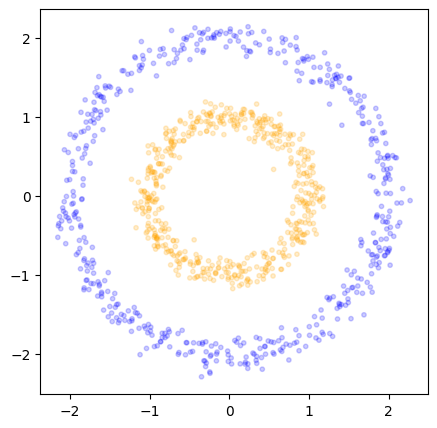

In [ ]:
X, y = sample_annuli()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

[2pt] Let's start by implmenting a logistic regression model (like in HW2). Fill the template below to complete the logisitc regression model. Use the binary cross entropy loss, torch.nn.BCELoss.

(i) Complete the model, (ii) finish the training loop, (iii) present the results with a figure (see the example below) and the classification accuracy

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.logis=nn.Linear(2,1)

    def forward(self, x):
        output=torch.sigmoid(self.logis(x))
        return output

In [ ]:
model = Model().to(device)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [ ]:
criterion = nn.BCELoss()

In [ ]:
# complete the following training loop.
for itr in range(1, 1001):
    optimizer.zero_grad()
    yh = model(X)
    yh=yh.squeeze()
    loss=criterion(yh.float(),y.float())
    loss.backward()
    optimizer.step()

    if itr%50==0:
      print(f"Iteration {itr}, Loss: {loss.item()}")


Iteration 50, Loss: 0.6914138197898865
Iteration 100, Loss: 0.6913040280342102
Iteration 150, Loss: 0.6913028359413147
Iteration 200, Loss: 0.6913028955459595
Iteration 250, Loss: 0.6913028955459595
Iteration 300, Loss: 0.6913028359413147
Iteration 350, Loss: 0.6913028359413147
Iteration 400, Loss: 0.6913028359413147
Iteration 450, Loss: 0.6913028359413147
Iteration 500, Loss: 0.6913028359413147
Iteration 550, Loss: 0.6913028359413147
Iteration 600, Loss: 0.6913028359413147
Iteration 650, Loss: 0.6913028359413147
Iteration 700, Loss: 0.6913028359413147
Iteration 750, Loss: 0.6913028359413147
Iteration 800, Loss: 0.6913028359413147
Iteration 850, Loss: 0.6913028359413147
Iteration 900, Loss: 0.6913028359413147
Iteration 950, Loss: 0.6913028359413147
Iteration 1000, Loss: 0.6913028359413147


Classification Accuracy:  52.73


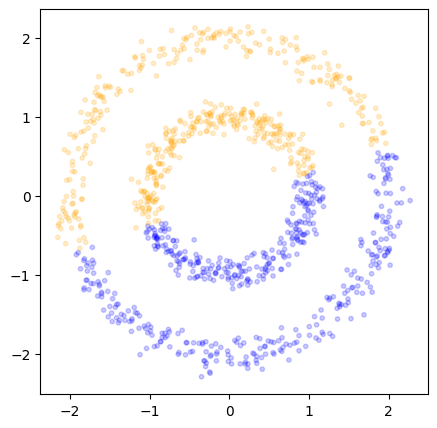

In [ ]:
# visualize the result and report the accuracy
with torch.no_grad():
    #Making prediction
    predictions = model(X)
    predicted_classes = (predictions>0.5).float()
    count = 0
    for i in range(len(predicted_classes)):
      if y[i]==predicted_classes[i]:
        count += 1
    accuracy = count/len(predicted_classes)*100
    #Creating a scatter plot to visualize the results
    #X, y = sample_annuli()
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    plot_scatter(ax, X, predicted_classes)
    print(f"Classification Accuracy: {accuracy: .2f}")

It is obvious that the logistic regression would not be able to distinguish two classes (not linearly separate data). You will have to build another model.

[2pt] [Feature engineering] In the class template below, implement your own model that will achieve 100% accuracy in classifying the data poitns in training set. There is one restriction; you are allowed to use "one" linear layer for your implementation as in the logistic regression model above. But you are allowed to use as many nonlinear functions as needed to engineer hand-crafted features.  

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.neuro = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.neuro(x)

In [ ]:
model = Model().to(device)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [ ]:
for itr in range(1, 1001):
    optimizer.zero_grad()
    yh = model(X)
    yh=yh.squeeze()
    loss=criterion(yh.float(),y.float())
    loss.backward()
    optimizer.step()

    if itr%50==0:
      print(f"Iteration {itr}, Loss: {loss.item()}")

Iteration 50, Loss: 1.771188726706896e-05
Iteration 100, Loss: 1.1155842003063299e-05
Iteration 150, Loss: 1.0190085959038697e-05
Iteration 200, Loss: 9.383674296259414e-06
Iteration 250, Loss: 8.631676791992504e-06
Iteration 300, Loss: 7.931788786663674e-06
Iteration 350, Loss: 7.290201210707892e-06
Iteration 400, Loss: 6.69840483169537e-06
Iteration 450, Loss: 6.158639280329226e-06
Iteration 500, Loss: 5.670470272889361e-06
Iteration 550, Loss: 5.224360393185634e-06
Iteration 600, Loss: 4.8182396312768105e-06
Iteration 650, Loss: 4.446380444278475e-06
Iteration 700, Loss: 4.110542249691207e-06
Iteration 750, Loss: 3.803499112109421e-06
Iteration 800, Loss: 3.52430379280122e-06
Iteration 850, Loss: 3.268820819357643e-06
Iteration 900, Loss: 3.0362923553184373e-06
Iteration 950, Loss: 2.8240006031410303e-06
Iteration 1000, Loss: 2.6291563699487597e-06


Classification Accuracy:  100.00


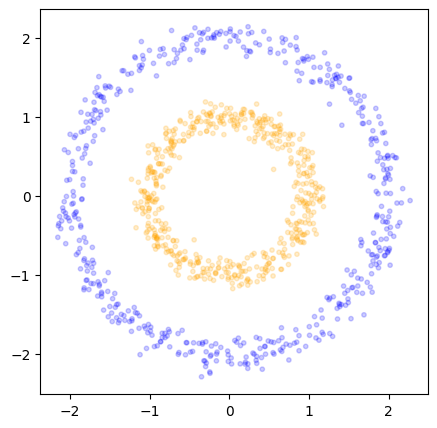

In [ ]:
with torch.no_grad():
    #Making prediction
    predictions = model(X)
    predicted_classes = (predictions>0.5).float()
    count = 0
    for i in range(len(predicted_classes)):
      if y[i]==predicted_classes[i]:
        count += 1
    accuracy = count/len(predicted_classes)*100
    #Creating a scatter plot to visualize the results
    #X, y = sample_annuli()
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    plot_scatter(ax, X, predicted_classes)
    print(f"Classification Accuracy: {accuracy: .2f}")



# Spiral dataset


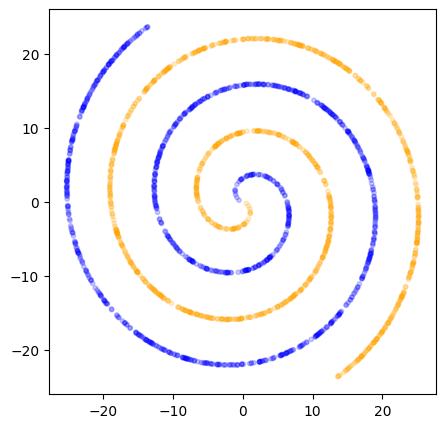

In [ ]:
X, y = sample_spiral()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

It's obvious that neither the logistic regression nor the model you developed for the second dataset would not work for this dataset.

[2pt] implemente a neural network of your choice and achieve 100% classification accuracy

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.neuro = nn.Sequential(
            nn.Linear(2, 256),
            nn.Tanh(),
            nn.Linear(256, 64),
            nn.Tanh(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.neuro(x)

In [ ]:
model = Model().to(device)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [ ]:
for itr in range(1, 1001):
    optimizer.zero_grad()
    yh = model(X)
    yh=yh.squeeze()
    loss=criterion(yh.float(),y.float())
    loss.backward()
    optimizer.step()

    if itr%50==0:
      print(f"Iteration {itr}, Loss: {loss.item()}")

Iteration 50, Loss: 0.6587590575218201
Iteration 100, Loss: 0.6074483394622803
Iteration 150, Loss: 0.5153902769088745
Iteration 200, Loss: 0.39108362793922424
Iteration 250, Loss: 0.17079441249370575
Iteration 300, Loss: 0.04305378720164299
Iteration 350, Loss: 0.01773778349161148
Iteration 400, Loss: 0.010356323793530464
Iteration 450, Loss: 0.006936218589544296
Iteration 500, Loss: 0.004838662687689066
Iteration 550, Loss: 0.003602381097152829
Iteration 600, Loss: 0.002861267188563943
Iteration 650, Loss: 0.0023480283562093973
Iteration 700, Loss: 0.0019561327062547207
Iteration 750, Loss: 0.0016508770640939474
Iteration 800, Loss: 0.001411142060533166
Iteration 850, Loss: 0.001218170509673655
Iteration 900, Loss: 0.0010634782956913114
Iteration 950, Loss: 0.0009368482860736549
Iteration 1000, Loss: 0.0008316340972669423


torch.Size([2048, 1])
tensor([0, 0, 0,  ..., 1, 1, 1])


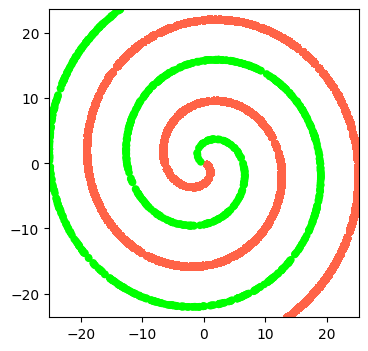

torch.Size([2048, 2])
tensor(0)
Accuracy is : 100.00%


In [ ]:
with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    axes = []
    axes.append(fig.add_subplot(1,1,1))#,sharex=True,sharey=True))
    xs, ys = X, y#sample_gaussian(n_samples=200) ; s = torch.linspace(0, 1, 10)
    y_pred = model(xs)
    print(y_pred.shape)
    label = (y_pred[:,0] >= 0.5).long()
    print(label)
    colors = ['lime','tomato']
    for i in range(1024):
        axes[0].scatter(xs[i,0], xs[i,1], c=colors[label[i]], edgecolor='none', s=30)
        axes[0].scatter(xs[i+1024:,0], xs[i+1024:,1], c=colors[label[i+1024]], edgecolor='none', s=30)
    axes[0].set_xlim(xs[:,0].min(), xs[:,0].max()) ; axes[0].set_ylim(xs[:,1].min(), xs[:,1].max())
    plt.show()

    print(xs.shape)
    err = torch.sum(torch.abs(label - y))
    print(err)

accuracy = ((label == y).float().mean().item())*100
print("Accuracy is : {:.2f}%".format(accuracy))